# Repaso - Métodos Numéricos (1/2)

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Autor: Claudio Canales Donoso
- Página: [ccdonoso.github.io](https://ccdonoso.github.io/)
- Cursos: Mecánica Computacional - Diseño Computarizado
- Universidad de Santiago de Chile
- Fecha: 05/03/24

License: BSD 3 clause

**Contenido** : Repaso de Métodos Numéricos.
- Raíces de una función
- Metódo de la bisección
- Newton Raphson
- Integración numérica (Trapecio y Simpson)
- Gauss Jordan 
- Preliminares de derivación numérica
- Problemas aplicados


## Teorema del valor intermedio y raíces de una función

Teorema del valor intermedio: Si $f$ es una función continua para todo $x$ en el intervalo cerrado $[a,b]$ y $d$ está entre $f(a)$ y $f(b)$, entonces hay un número $c$ en $(a,b)$ tal que $f(c)=d$

Si eres más bien una persona visual, debes imaginar una función continua, en la que conoces el valor de la función en dos puntos, $x=a$ y $x=b$, pero no sabes realmente qué hace la función entre los puntos $x=a$ y $x=b$:

El **teorema del valor intermedio** dice que, a pesar de que no se sabe realmente qué hace la función entre los puntos extremos, existe un punto $x=c$ que da un valor intermedio para $f$.

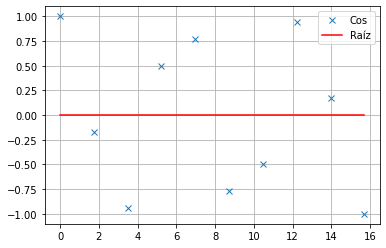

In [24]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.,np.pi*5.,10)
y = np.cos(x)
plt.grid()
plt.plot(x,y,'x')
plt.plot(x,0*y,'r-')
plt.legend(['Cos','Raíz'])



**Este teorema sirve para determinar numéricamente los intervalos en los que existen raíces**. Para ello se utiliza el siguiente criterio para determinar si es que existe una raíz entre $[a,b]$:

- Es necesario asegurar la continuidad de la función $f$ en el intervalo $[a,b]$.
- Si $f(a) \cdot f(b)<0$ implica que $f(a)$ ó $f(b)$ presentan signo opuesto y por el teorema del valor intermedio se demuestra que existe **por lo menos un valor** que cumple con la condición de ser raíz $f(c)=0$.

**Teorema (Bolzano)**: Si una función $f(x)$ es continua en un intervalo $[a, b]$ y $f(a) \cdot f(b) < 0$, entonces existe un valor $c \in (a, b)$ para el que $f(c) = 0$.

**Este principio se ilustra a continuación (Fuente:Wikipedia)**

<img src="img/1200px-Illustration_for_the_intermediate_value_theorem.svg.png" alt="IVT" width="600"/>

### Las raíces sirven para resolver problemas no-lineales 

Cualquier función $f(x)=g(x)$ puede ser escrita como

$$F(x) = 0$$


$$ $$

Por lo tanto, a continuación se definirá una función que encuentra los intervalos de una función en el que existe una raíz.

In [2]:
# Definir una función para encontrar las raíces

def seno(x):            #np.sin
    return np.sin(x)

#Tambien es posible 

seno_lambda  = lambda x: np.sin(x)



In [3]:
def root_finder(funcion, a, b, n):
    """Esta función encuentra los intervalos en el que existen raíces

    Parámetros
    ----------
    funcion : function
        Function.
    a : float
        Punto inicial del intervalo.
    b : float
        Punto final del intervalo.
    n : int
        Numero de divisiones del intervalo

    Retorna
    -------
    intervalos : ndarray (Observar que al inicio es una lista y despues se transforma)
        Matriz que contiene los intervalos - Cada fila es una raíz diferente y las dos columnas son el intervalo
    """
    x = np.linspace(a,b,n)
    
    intervalos = []
    
    for i in range(len(x)-1):
        if funcion(x[i])*funcion(x[i+1]) < 0:
            intervalos.append([x[i],x[i+1]])
    
    return np.array(intervalos)

Grafiqué la función en un intervalo entre $[0,10 \pi]$ y los intervalos obtenidos con la función ```root_finder```

[[ 2.48020473  3.30693964]
 [ 5.78714436  6.61387927]
 [ 9.094084    9.92081891]
 [12.40102363 13.22775854]]


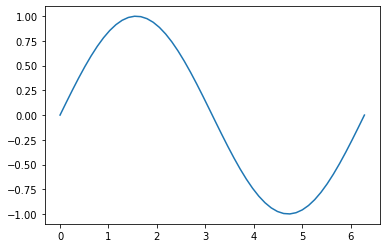

In [4]:
x = np.linspace(0.,2*np.pi,50)
y = np.sin(x)

plt.plot(x,y,'-')

roots = root_finder(seno, 0, 5*np.pi, 20)

#plt.plot(roots,roots*0.,'rx')

print(roots)

## Método de la bisección

Para una función f(x) dada, el algoritmo del método de bisección funciona como sigue $[1]$:

1. Se eligen dos valores a y b para los que $f(a) \cdot f(b) < 0$
2. Se divide el intervalo por la mitad, un punto medio c se calcula como la media aritmética entre $a$ y $b$, $c = (a + b) / 2$
3. La función $f(c)$ es evaluada
4. Si $f(c) = 0$ solucionamos el problema
5. Si $f(c) \neq 0$ tenemos que seguir iterando $c$
    1. Si $f(c)$ tiene el mismo signo que $f(a)$ sustituimos $a$ por $c$ y mantenemos el mismo valor para $b$
    2. Si $f(c)$ tiene el mismo signo que $f(b)$ sustituimos $b$ por $c$ y mantenemos el mismo valor para $a$
6. Volvemos al paso 2. y recalculamos $c$ con el nuevo valor de $a$ ó $b$

La siguiente imagen ilustra el método (Fuente: Wikipedia):

<img src="img/bisection.png" alt="IVT" width="300"/>

In [5]:
def biseccion(funcion, a, b, niter=50, ftol=1e-12): #key argument
    """Usa el método de la bisección para encontrar la raíz en el intervalo [a,b]

    Parámetros
    ----------
    fun : function
        Esta es la función que queremos solucionar.
    a : float
        Punto inicial del intervalo.
    b : float
        Punto final del intervalo.
    niter : int, opcional
        Número máximo de iteraciones.
    ftol : float, opcional
        Tolerancia -> Define el cero numérico.

    Retorna
    -------
    x : float 
        Raíz aproximada.
    """    
    i , error = 0 , 1.  #Inicializa el contador y un error de 100%
    
    
    while (i<niter) and (error > ftol):
        c = (a+b)/2.
        if funcion(a)*funcion(c) < 0:
            b = c
        elif funcion(b) * funcion (c) < 0 :
            a = c
        i = i + 1
        error = np.abs(funcion(c))
    return c

In [6]:
print(biseccion(seno, 0.5, 2*np.pi-0.1, niter=80))
np.pi

3.1415926535906316


3.141592653589793

In [7]:
send = lambda x: np.sin(0.1*x)
roots = root_finder(send, 0., np.pi*30, 9000)

roots

array([[31.40894444, 31.41941758],
       [62.82836203, 62.83883516]])

In [8]:
for i in range(roots.shape[0]):
    print(biseccion(send, roots[i,0], roots[i,1]))

31.41592653589142
62.83185307180234


## Newton raphson

El método Newton-Raphson, o método Newton, es una potente técnica para resolver ecuaciones numéricamente. Como gran parte del cálculo diferencial, se basa en la simple idea de la aproximación lineal. El método Newton, utilizado correctamente, suele llegar a una raíz con una eficacia devastadora $[2]$. 

Las series de Taylor son las que nos permiten aproximar funciones:

$$f(x)=\sum_{k=0}^\infty f^{(k)}(a)\frac{(x-a)^k}{k!}$$

El metodo de Newton se basa en realizar una aproximación lineal de la raíz en base a las series de Taylor. Si solo consideramos el polinomio de primer orden de la serie de Taylor, entonces tenemos que

$$ 0 = f(r) = f(x_0 +h) \approx f(x_0) + h f'(x_0) $$ ,

donde, $r$ es la raíz y $h$ es un paso infinitesimal. Sin embargo, si consideramos que $h=(x_1-x_0)$ entonces se puede obtener el valor de $x_1$ y asi aproximar una raíz.

$$0 \approx f(x_0) + (x_1-x_0) f'(x_0)$$

Reordenando los términos, se obtiene que una aproximación a la raíz es:

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

Si se repite este procedimiento, se obtiene el método de Newton:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$


La siguiente animación ilustra el procedimiento (Fuente: [Medium](https://medium.com/@ruhayel/an-intuitive-and-physical-approach-to-newtons-method-86a0bd812ec3)):

<img src="img/newronrapshon.gif" alt="asdasd" width="450"/>

In [9]:
def newton_raphson(f, df, x0, niter=50, ftol=1e-8):
    """Esta función utiliza el metodo de Newton raphson para encontrar la raíz de una ecuación

    Parameters
    ----------
    f : funcion
        Función.
    df : function
        Derivada de la función.
    x0 : float
        Inicialización.
    niter : int, opcional
        Máximo numero de iteraciones.
    ftol : float, opcional
        Tolerancia de la raíz.

    Retorna
    -------
    x : float
        Solución.
    """
    i , error = 0 , 1.  #Inicializa el contador y un error de 100%
    
    x = x0
    while (i<niter) and (error > ftol):
        x = x-f(x)/df(x)
        
        i = i + 1
        error = np.abs(f(x))
    return x

In [10]:
newton_raphson(np.sin, np.cos, np.pi/2., niter=10,ftol = 0.) 

-1.6331239353195368e+16

## Problema: Encontrar las 3 raíces del siguiente polinomio utilizando las funciones definidas anteriormente

$$ f(x)=-x^3 + x^2 + 10x - 10 = 0$$

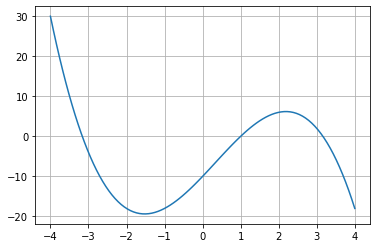

In [11]:
x = np.linspace(-4,4,100)
y = -x**3.+ x**2. + 10.*x - 10.
plt.plot(x,y)
plt.grid()

In [12]:
# Solucionar el problema

## Método del Trapecio

$$\int f(x)dx \approx \sum w_i f(x_i) $$

Sea $f(x)$ continua en $[a,b]$. Partimos el intervalo $[a,b]$ en $n$ subintervalos iguales, cada uno de anchura

$$ \Delta x=\frac{b-a}{n}$$

Tal que:

$$a=x_0<x_1<x_2< \cdots < x_n =b$$

<img src="img/trapezoidal-rule-illustration1.svg" alt="TPR3" width="450"/>

La integral de cada intervalo, se puede calcular como:

$$I_i = \frac{f(x_i)+f(x_{i+1})}{2} \Delta x $$

Y la integral de la función :

$$\sum_1^n I_i$$

$$∫^b_af(x)\,dx≈\frac{Δx}{2}\big(f(x_0)+2\,f(x_1)+2\,f(x_2)+\cdots +2\,f(x_{n-1})+f(x_n)\big).\nonumber$$

In [13]:
def trapecio(f, a , b, n=50):
    """Esta función utiliza el método del trapecio para integrar la función

    Parameters
    ----------
    f : funcion
        Función.
    a : float
        Límite inferior de integración.
    b : float
        Límite superior de integración.
    n : int, opcional
        Número de puntos evaluados.

    Retorna
    -------
    integral : float
        Integral.
    """    
    x = np.linspace(a,b,n)
    integral = 0.
    dx = x[1]-x[0]
    for i in range(n-1):
        integral = dx/2.*(f(x[i])+f(x[i+1]))+ integral
    return integral

In [14]:

print(trapecio(seno,0.,np.pi,n=3)) # Deberia dar 2

1.5707963267948968


## Método de Simpson

El método del trapecio utiliza rectas o polinomios de primer orden para aproximar la solución. En cambio, el método de Simpson utiliza aproximaciones de segundo orden, es decir aproxima a través de parabolas.

<img src="img/simpsons-6a.png" alt="TPR" width="250"/>

Por lo tanto, esta integral se puede aproximar utilizando la siguiente expresión

$${\int\limits_a^b {f\left( x \right)dx} }\approx{ {\frac{{\Delta x}}{3}}\left[ {f\left( {{x_0}} \right) + 4f\left( {{x_1}} \right) }\right.}+{\left.{ 2f\left( {{x_2}} \right) + 4f\left( {{x_3}} \right) }\right.}+{\left.{ 2f\left( {{x_4}} \right) + \cdots }\right.}+{\left.{ 4f\left( {{x_{n – 1}}} \right) + f\left( {{x_n}} \right)} \right].} $$

Es posible observar que los coeficientes tienen el siguiente orden (1,4,2,4,....,4,2,4,1)


In [15]:
def simpson(f, a , b, n=20):
    """Esta función utiliza el método de Newton raphson para encontrar la raíz de una ecuación

    Parameters
    ----------
    f : funcion
        Función.
    a : float
        Límite inferior de integración.
    b : float
        Límite superior de integración.
    n : int, opcional
        Número de puntos evaluados.

    Retorna
    -------
    integral : float
        Integral.
    """    
    x = np.linspace(a,b,n)
    integral = 0.
    dx_3 = (x[1]-x[0])/3.
    
    for i in range(n):
        if i== 0 or i==len(x)-1:
            p=1
        elif i%2 == 1:
            p=4
        elif i%2 == 0:
            p=2
        integral =p * f(x[i]) + integral
        
    return integral * dx_3

In [23]:
print(simpson(np.sin,0.,np.pi,n = 3))


2.0943951023931953


## Gauss-Jordan

**La eliminación de Gauss-Jordan** es un algoritmo que puede utilizarse para resolver sistemas de ecuaciones lineales y encontrar la inversa de cualquier matriz invertible. Se basa en tres operaciones elementales de fila que se pueden utilizar en una matriz:

1. Intercambiar las posiciones de dos de las filas
2. Multiplicar una de las filas por un escalar no nulo
3. Sumar o restar el múltiplo escalar de una fila a otra fila

Pasos para la eliminación de Gauss-Jordan
Para realizar la eliminación de Gauss-Jordan:

1. Intercambiar las filas de manera que todas las filas con todas las entradas nulas estén en la parte inferior
2. Intercambiar las filas de modo que la fila con la mayor entrada no nula a la izquierda esté en la parte superior.
3. Multiplica la fila superior por un escalar de forma que la entrada principal de la fila superior se convierta en 1.
4. Sume/reste los múltiplos de la fila superior a las otras filas de modo que todas las demás entradas de la columna que contiene la entrada principal de la fila superior sean todas cero.
5. Repita los pasos 2-4 para la siguiente entrada no nula de la izquierda hasta que todas las entradas principales sean 1.
6. Intercambie las filas de modo que la entrada principal de cada fila distinta de cero esté a la derecha de la entrada principal de la fila superior.



In [ ]:
#NO MODIFICAR NADA
#NO MODIFICAR NADA
#NO MODIFICAR NADA
#NO MODIFICAR NADA



def matrix_to_markdown(a):
    """Returns a matrix representation [n,
    :A: numpy array
    :returns: LaTeX bmatrix as a string
    """
    lines = np.array2string(a,precision=2).replace('[', '').replace(']', '').splitlines()
    rv = [r'$ A = \begin{matrix}']
    for l in lines:
        x=l.split()
        h=""
        for i in range(len(x)):
            if i<len(x)-2:
                h+=str(x[i])+"x_"+r"{"+str(i+1)+r"}"
                h+="+"
            if i==len(x)-1:
                h+=str(x[i-1])+"x_"+r"{"+str(i)+r"}"
                h+="="+x[i]
        rv += [' ' + h + r'\\']
    rv += [r'\end{matrix}$']
    display(Markdown('\n'.join(rv)+r"\\"))
    return rv

def Gauss_Jordan_Latex_Equation(A):
    """
    This function display how the Gauss Jordan method works
    Solves the system of equation of a ndarray [n,n+1]
    """
    n=A.shape[0]
    matrix_to_markdown(A)
    for i in range(n):
        if(A[i,i]==0):
            for k in range (n-1,-1,-1):
                if(A[k,i]!=0):
                    A[i,:]=A[i,:]+A[k,:]
                    display(Markdown("$R{:d}+R{:d}=$".format(i+1,k+1)))
                    matrix_to_markdown(A)
                    break
        display(Markdown(("$R{:d}/({:.2f})=$".format(i+1,A[i,i]))))
        A[i,:]=A[i,:]/A[i,i]
        matrix_to_markdown(A)
        for j in range(n):
            if(i!=j):
                display(Markdown(("$R{:d}-R{:d}*({:.2f})=$".format(j+1,i+1,A[j,i]))))
                A[j,:]=A[j,:]-A[i,:]*A[j,i]
                matrix_to_markdown(A)
    return A

A1=np.array([[4., 8.,-12.,44.],
             [3., 6.,-8.,32.],
             [-2.,-1,1.,-7.]])


Gauss_Jordan_Latex_Equation(A1)
#NO MODIFICAR NADA
#NO MODIFICAR NADA
#NO MODIFICAR NADA
#NO MODIFICAR NADA

In [18]:
def gauss_jordan(A):
    """Resuelve un sistema de ecuaciones utilizando Gauss_Jordan.
    Parámetros:
    -----------
    A: ndarray
        Matriz de nxn+1 o n x 2n para resolver un sistema de ecuaciones
    
    Retorna:
    -----------
    x: ndarray
        Vector o matriz que contiene la solución
    """
    n=A.shape[0]
    for i in range(n):
        A[i,:] = A[i,:]/A[i,i]
        for j in range(n):
            if(i!=j):
                A[j,:]=A[j,:]-A[i,:]*A[j,i]
    x = A[:,-1]
    return x

In [19]:
A1=np.array([[4., 8.,-12.,1.],
             [1., 6.,-8.,0.],
             [-2.,-1,1.5,0.]])

gauss_jordan(A1) 

array([-0.08333333, -1.20833333, -0.91666667])

## Derivación numérica

Diferenciación Hacia adelante

$$f'(x_0) \approx \frac{f(x_0+h)-f(x_0)}{h} $$

Diferenciación hacia atrás

$$f'(x_0) \approx \frac{f(x_0)-f(x_0-h)}{h} $$

Diferencia centrada

$$f'(x_0) \approx \frac{f(x_0+h)-f(x_0-h)}{2h} $$

$$f''(x_0) \approx \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{2h} $$

## Problemas Aplicados

## Problema 1: Serie de Fourier.
1-Representar la siguiente función de manera periódica a través de la serie de Fourier.

$$f(x) = x^3 -x^2 \quad x \in [-\pi,\pi] $$

Recordar que:

$$f(x) = a_0  + \sum_{n=1}^\infty (a_n cos(\frac{2n\pi x}{T})+b_n sin(\frac{2n\pi x}{T}))$$

$$a_0 = \frac{1}{T}\int_{-T}^{T} f(x) dx$$

$$a_n = \frac{2}{T}\int_{-T}^{T} f(x)cos(\frac{2n\pi x}{T}) dx$$

$$b_n = \frac{2}{T}\int_{-T}^{T} f(x)sin(\frac{2n\pi x}{T}) dx$$

a) Utilizar 4, 8 , 20 términos.


b) Graficar

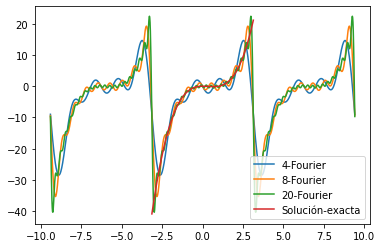

In [20]:
# Para resolver este problema se separa el problema en 2 partes,
# 1 .-obtener los Coeficientes 2.- evaluar la transformada de Fourier.
import numpy as np
import matplotlib.pyplot as plt

def fourier_coeff(f,a,b,nf=20):
    """
    Parámetros
    -------------
    f : function
        Función en el intervalo
        
    a : float
        límite inferior del intervalo
        
    b : float
        límite superior intervalo
        
    nf : int
        cantidad de coeficientes serie de Fourier
        
    Retorno
    -------------
    a0: float
        coeficiente
    an: ndarray
        vector que contiene cada uno de los coeficientes a_n
    bn: ndarray
        vector que contiene cada uno de los coeficientes b_n
    """

    an , bn = np.zeros((2,nf))
    
    T = (b-a)
    
    a0 = 1./T*trapecio(lambda x: f(x), a , b, n=100)
    
    for i in range(nf):
        an[i] = 2./T*trapecio(lambda x: f(x)*np.cos(2.*(i+1.)*np.pi*x/T), a , b, n=100)
        bn[i] = 2./T*trapecio(lambda x: f(x)*np.sin(2.*(i+1.)*np.pi*x/T), a , b, n=100)
    return a0,an,bn


def serie_fourier(x,a0,an,bn,T):
    """
    Parámetros
    -------------
    x : float
        argumento de f(x)
        
    a0: float
        coeficiente
    an: ndarray
        vector que contiene cada uno de los coeficientes a_n
    bn: ndarray
        vector que contiene cada uno de los coeficientes b_n
    T : float
        periodo
        
    Retorno
    -------------
    y: float
        approximación serie de fourier
    """
    y = a0
    
    for i in range(len(an)):
        
        y = an[i]*np.cos(2.*(i+1.)*np.pi*x/T) + y
        
        y = bn[i]*np.sin(2.*(i+1.)*np.pi*x/T) + y
        
    return y

#Ejecución de las funciones
for n in [4,8,20]:
    a0,an,bn = fourier_coeff(lambda x: x**3-x**2,-np.pi,np.pi,nf=n)
    x = np.linspace(-np.pi*3,np.pi*3,1000)
    y = serie_fourier(x,a0,an,bn,np.pi*2.)
    plt.plot(x,y)


x1 = np.linspace(-np.pi,np.pi,1000)
y1 = x1**3-x1**2
plt.plot(x1,y1)

plt.legend(["4-Fourier","8-Fourier","20-Fourier","Solución-exacta"])

## Problema 2: Carro propulsado.
Se tiene un carro de 20kg, que está siendo propulsado por un flujo másico de $\dot{m}$ = $0,5kg/s$
y $v_{chorro} = 5m/s$. La fuerza de arrastre de este vehı́culo es de $0,75v^2 [N]$ siendo $v$ la velocidad
del carro en m/s. Considerar que el carro se vacı́a en 30 segundos y parte del reposo. Se pide:

<img src="img/carro.png" alt="TPR2" width="250"/>

$$m(t)\frac{dv}{dt}=\dot{m}(v_{chorro}-0.75v^2) $$

$$\int v dt = x(t)$$

$$\frac{dv}{dt} \approx \frac{v(t_{i+1})-v(t_i)}{dt}$$

$$ v(t_{i+1}) \approx f(t_i) $$

1. Determinar la velocidad en la cual la aceleración es nula.
2. Obtener el perfil de velocidad hasta cuando el carro se vacía. Considerar un paso temporal de $0.05 [S]$.
3. Obtener el perfil de desplazamiento en base al perfil de velocidad obtenido anteriormente. 

```Solución```
1.  $0 = \dot{m}(v_{chorro}-0.75v^2)$
2. $ v(t_{i+1}) = \frac{\dot{m}(v_{chorro}-0.75v^2)}{m(t)} dt+ v(t_i) $
3. Integrar la velocidad anterior 

Cuando la aceleración es nula, la velocidad es: 2.582 m/s
Observar que la velocidad se estabiliza en la velocidad terminal obtenida anteriormente


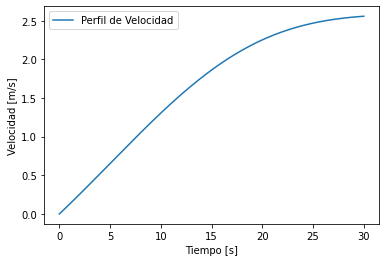

In [21]:
# 1.- Esta parte consiste en obtener la raices de ese problema, se puede resolver facilmente
# pero se utilizara newton raphson para ilustrar como solucionarlo
vel = newton_raphson(lambda x: 5-0.75*x**2, lambda x: -2*0.75*x , 10., niter=50, ftol=1e-14)
print("Cuando la aceleración es nula, la velocidad es: {:.3f} m/s".format(vel))

#2.- Se obtendra el vector de velocidad a traves de la recursión
m_dot = 0.5
v_chorro = 5.
steps = 1000
t = np.linspace(0,30,steps)
v = np.zeros(t.shape)
dt = t[1] - t[0]
for i in range(steps-1):
    m_t = 20. - m_dot*(t[i])
    v[i+1] = dt*m_dot*(v_chorro-0.75*v[i]**2)/(m_t) + v[i]

plt.plot(t,v)
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.legend(["Perfil de Velocidad"])
print("Observar que la velocidad se estabiliza en la velocidad terminal obtenida anteriormente")

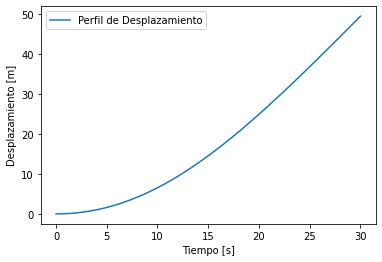

In [22]:
#3.- Integrar con trapecio
x = np.zeros(t.shape)

for i in range(len(t)-1):
    x[i+1] = dt/2.*(v[i+1]+v[i]) + x [i]
    
plt.xlabel("Tiempo [s]")
plt.ylabel("Desplazamiento [m]")
plt.plot(t,x)
plt.legend(["Perfil de Desplazamiento"])

## Referencias

[1] Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 2). New York: Mcgraw-hill.